![](/pictures/laptop-data.png)
## Introduction
In today's session, we will 

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
#import pandas_datareader as web_reader
from pandas_datareader import data as pdr
import yfinance as yf


import matplotx
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
from scipy.stats import norm
import math
import seaborn as sns

tickers = ['SPY']

start_date = '2018-09-14'
end_date = '2022-09-14'
tickers = ['SPY', 'AGG']
#yf.pdr_override(tickers)
df = yf.download(tickers,  start=start_date, end=end_date)
data = df.Close.SPY.resample("B").last().fillna(method="bfill")
data_agg = df.Close.AGG.resample("B").last().fillna(method="bfill")

[                       0%                       ]

[*********************100%***********************]  2 of 2 completed

## Plot Historical Close Price

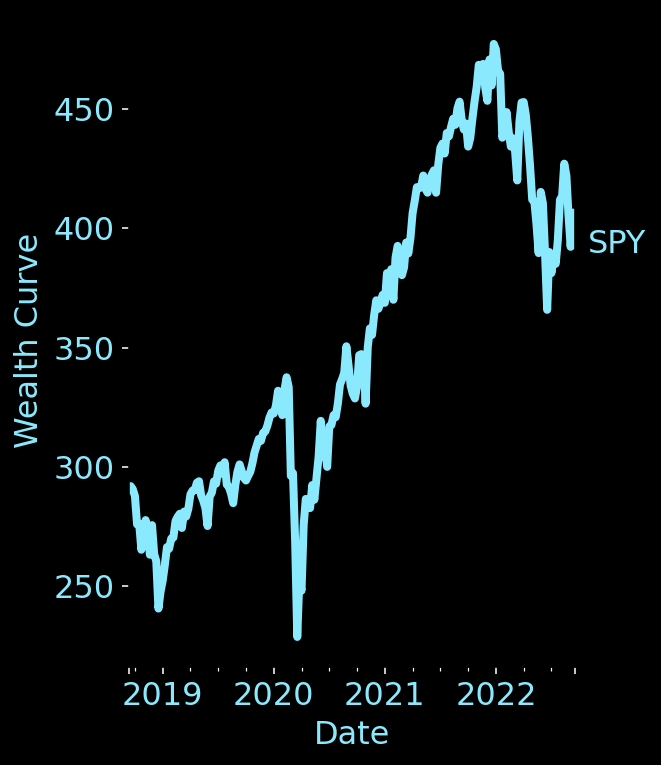

In [2]:
tpl_path = "https://github.com/vdenoise/templates/raw/master"
mpl_tpl_path = f"{tpl_path}/matplotlib"

plt.style.use(f"{mpl_tpl_path}/dracula_slide.mplstyle")
data.resample("W").last().plot(figsize=(4,6));
plt.ylabel("Wealth Curve")  
matplotx.line_labels()  

plt.savefig("output/wealth_curve_spy.png" );

## Plot Historical Returns

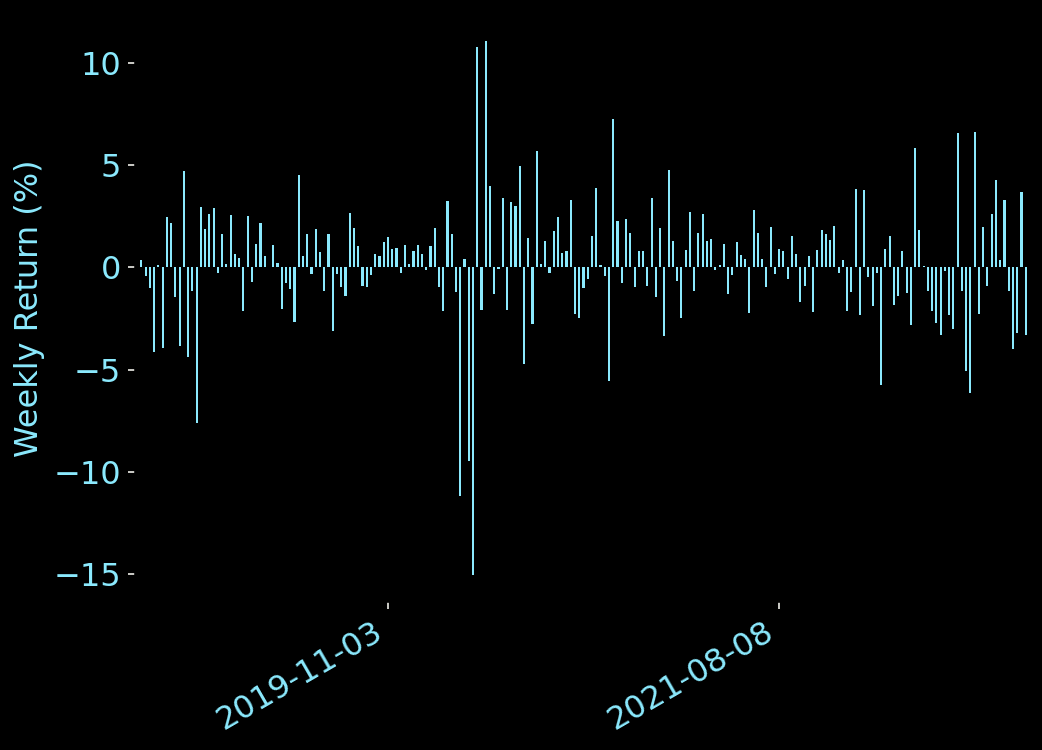

In [3]:
plt.figure(figsize=(8, 6))
data_bar = data.resample("W").last().pct_change().multiply(100)
index = data_bar.index
index = [pd.to_datetime(date, format='%Y-%m-%d').date() for date in index]
data_bar.index = index
ax = data_bar.plot.bar()
plt.ylabel("Weekly Return (%)")
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gcf().autofmt_xdate()
plt.savefig("output/weekly_returns_spy.png" );

## Sorted Weekly Returns

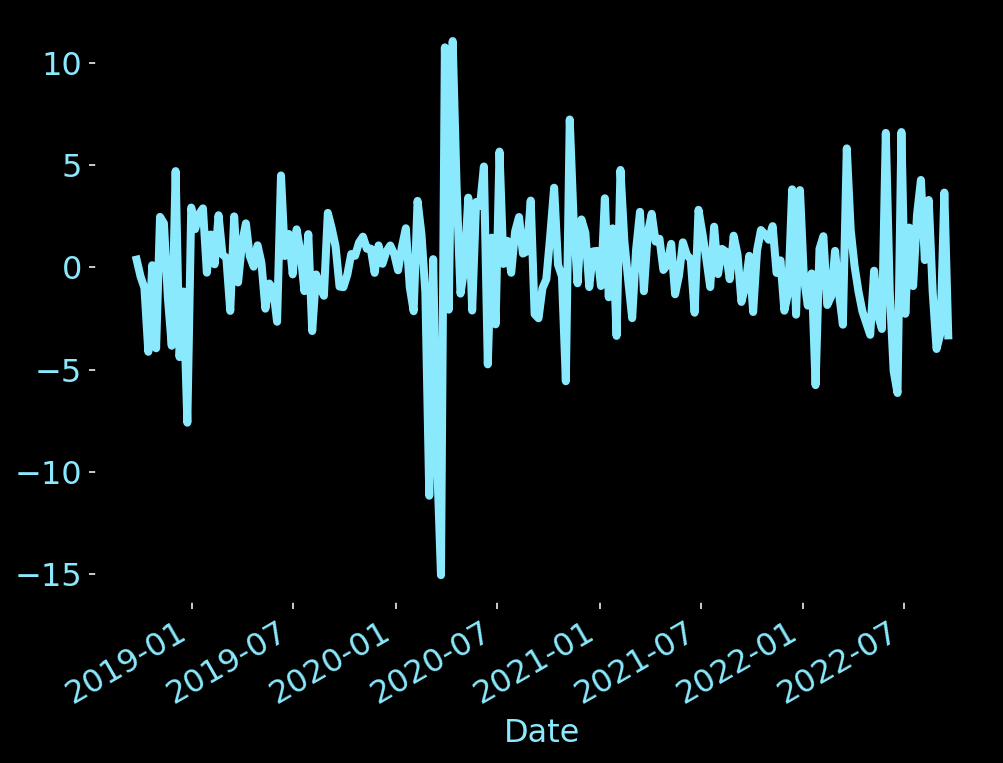

In [4]:
sorted_returns = data.resample("W").last().pct_change().multiply(100).sort_values()
sorted_returns.plot(figsize=(8, 6));
plt.savefig("output/sorted_weekly_returns_spy.png" );

## Return Distribution

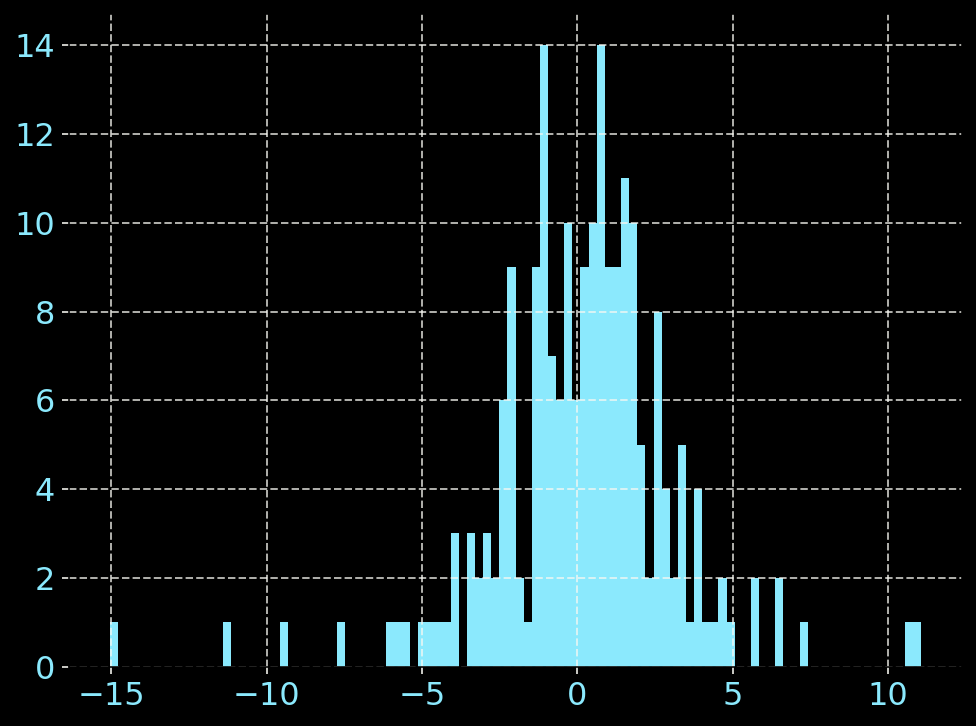

In [5]:
data_bar.hist(bins=100, figsize=(8,6));

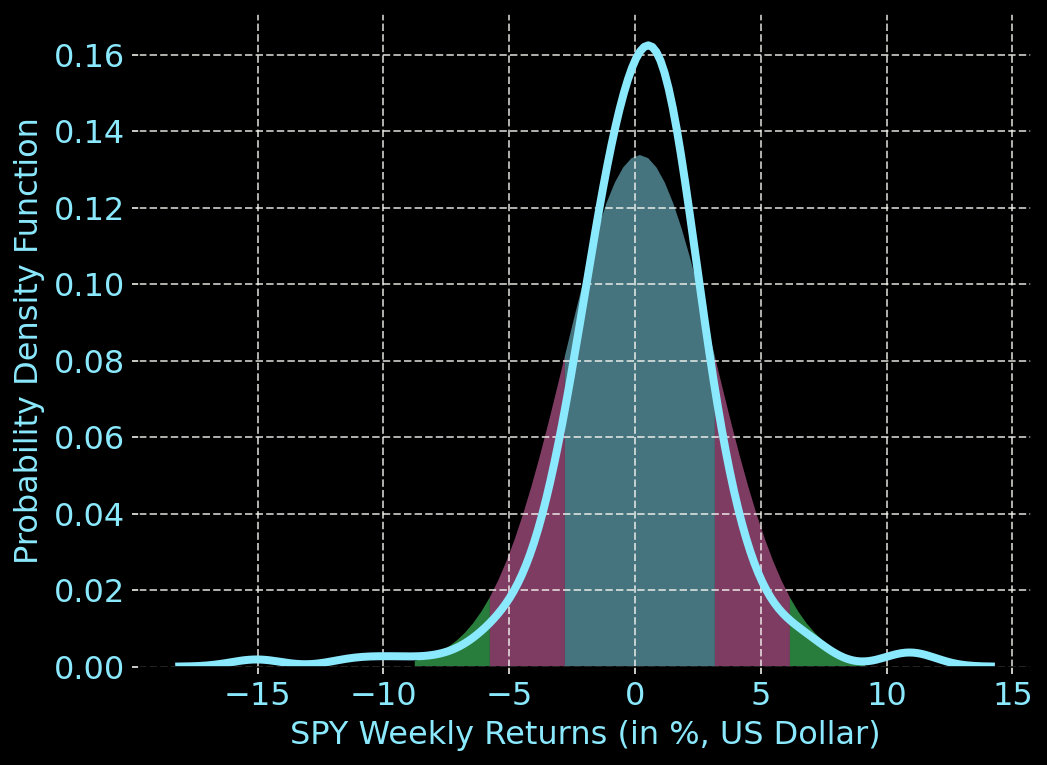

In [6]:
plt.figure(figsize=(8, 6))
ax = sns.kdeplot(data_bar)
mean = data_bar.mean()
std = data_bar.std()
N = 10
for i in [1, 2, 3]:
    x1 = np.linspace(mean - i*std, mean - (i - 1)*std, N)
    x2 = np.linspace(mean - (i - 1)*std, mean + (i - 1)*std, N)
    x3 = np.linspace(mean + (i - 1)*std, mean + i*std, N)
    x = np.concatenate((x1, x2, x3))
    x = np.where((mean - (i - 1)*std < x) & (x < mean + (i - 1)*std), np.nan, x)
    y = norm.pdf(x, mean, std)
    ax.fill_between(x, y, alpha=0.5)

plt.xlabel("SPY Weekly Returns (in %, US Dollar)")
plt.ylabel("Probability Density Function")
#plt.xticks(ticks=range(0, 10))
plt.grid()

plt.show()

## Historical Volatility 

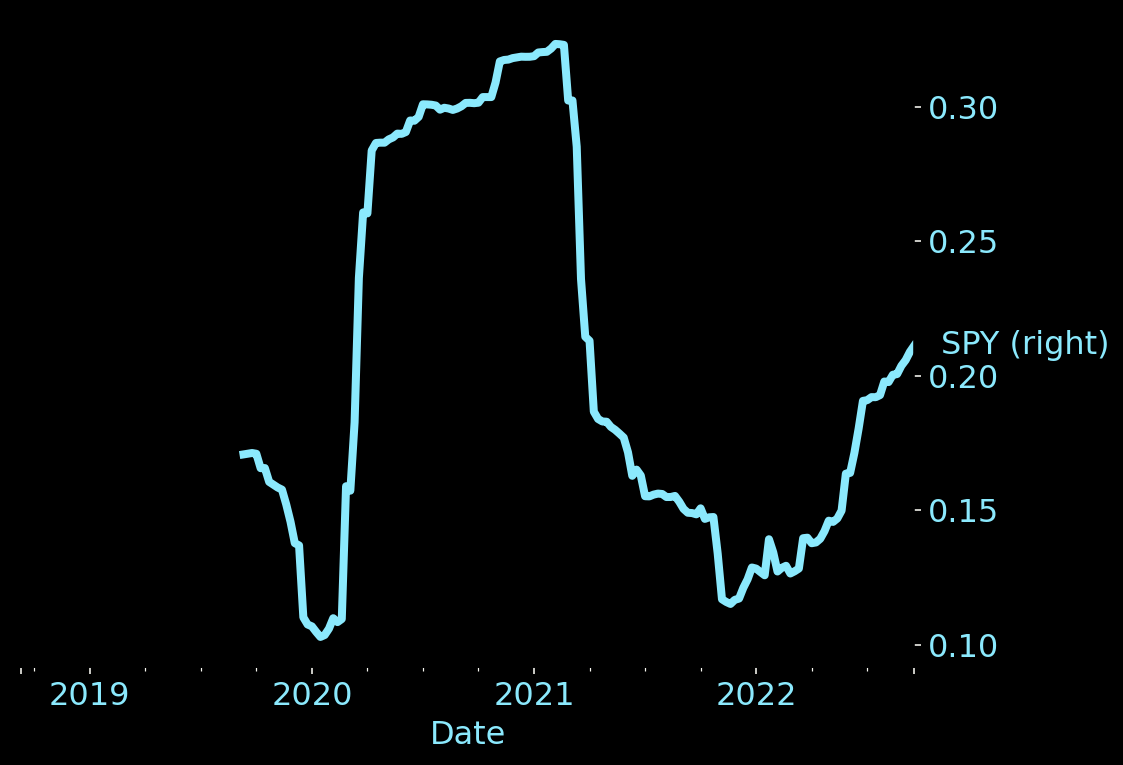

In [7]:
plt.figure(figsize=(8, 6))
plt.savefig("output/wealth_curve_spy.png" );
data.resample("W").last().pct_change().rolling(52).std().multiply(math.sqrt(52)).plot(secondary_y=True)
matplotx.line_labels() 
plt.savefig("output/wealth_curve_spy_with_vol.png" );

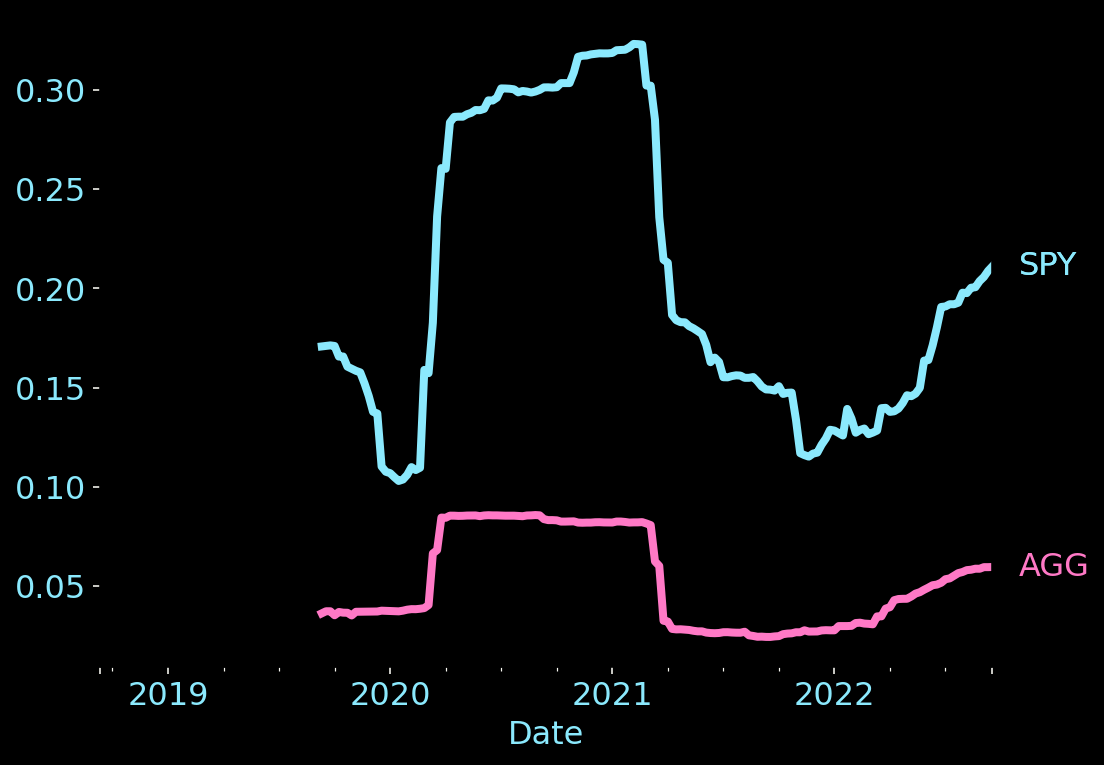

In [8]:
plt.figure(figsize=(8, 6))
data.resample("W").last().pct_change().rolling(52).std().multiply(math.sqrt(52)).plot(secondary_y=False)
matplotx.line_labels()
plt.savefig("output/vol_spy.png" );
data_agg.resample("W").last().pct_change().rolling(52).std().multiply(math.sqrt(52)).plot(secondary_y=False)
matplotx.line_labels()
plt.savefig("output/vol_spy_with_agg.png" );
